In [1]:
#import some packages you will need
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import scipy.stats as ss

In [2]:
#define your function for the "thing" you want to compute, based on your 4 parameters
def total_model(param1,param2,param3,param4):
    some_value=2*param1+param2+3*param3+param4
    return(some_value)

# Simple Monte Carlo (MC) Sampling

21.756143477106306
6.960028722290964
7.089752540110986


(array([0.001043  , 0.        , 0.        , 0.        , 0.        ,
        0.001043  , 0.        , 0.001043  , 0.00312901, 0.001043  ,
        0.00208601, 0.00730102, 0.00625802, 0.01251604, 0.01564504,
        0.01460204, 0.01460204, 0.01773105, 0.02711808, 0.04797814,
        0.02711808, 0.04693513, 0.05215015, 0.04693513, 0.06675219,
        0.03859111, 0.06466619, 0.06362318, 0.05423616, 0.05527916,
        0.04484913, 0.04902114, 0.04797814, 0.03754811, 0.0365051 ,
        0.02398907, 0.02086006, 0.01147303, 0.01773105, 0.01147303,
        0.00938703, 0.01251604, 0.00938703, 0.00417201, 0.00625802,
        0.00312901, 0.00312901, 0.00208601, 0.001043  , 0.001043  ]),
 array([-4.18496783, -3.22619782, -2.2674278 , -1.30865778, -0.34988776,
         0.60888225,  1.56765227,  2.52642229,  3.48519231,  4.44396232,
         5.40273234,  6.36150236,  7.32027238,  8.27904239,  9.23781241,
        10.19658243, 11.15535244, 12.11412246, 13.07289248, 14.0316625 ,
        14.99043251, 15.94

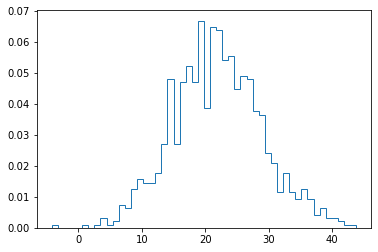

In [3]:
#define number of samples
nsamp = 1000

#draw samples from parameter distributions (here I have assumed normal distributions)
par1 = ss.norm(loc=5.,scale=3).rvs(nsamp)
par2 = ss.norm(loc=3.,scale=1.).rvs(nsamp)
par3 = ss.norm(loc=2.,scale=1.).rvs(nsamp)
par4 = ss.norm(loc=3.,scale=2.).rvs(nsamp)

#compute "thing" you are interested in, using above samples
thing = total_model(par1,par2,par3,par4)

#print out median and 1 sigma values for "thing" + plot a histogram
print(np.median(thing))
print(np.median(thing)-np.quantile(thing,0.15))
print(np.quantile(thing,0.85)-np.median(thing))
plt.hist(thing,bins=50,histtype='step',density=True)

# MCMC Sampling with PyMC

/var/folders/f4/vlzp24jx6r9962ljc6g1mcn00000gn/T/ipykernel_93577/1688478122.py:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=nsamp)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [par4, par3, par2, par1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


22.002783492611826
7.341963248061459
7.396548943214363


(array([0.001043  , 0.        , 0.        , 0.        , 0.        ,
        0.001043  , 0.        , 0.001043  , 0.00312901, 0.001043  ,
        0.00208601, 0.00730102, 0.00625802, 0.01251604, 0.01564504,
        0.01460204, 0.01460204, 0.01773105, 0.02711808, 0.04797814,
        0.02711808, 0.04693513, 0.05215015, 0.04693513, 0.06675219,
        0.03859111, 0.06466619, 0.06362318, 0.05423616, 0.05527916,
        0.04484913, 0.04902114, 0.04797814, 0.03754811, 0.0365051 ,
        0.02398907, 0.02086006, 0.01147303, 0.01773105, 0.01147303,
        0.00938703, 0.01251604, 0.00938703, 0.00417201, 0.00625802,
        0.00312901, 0.00312901, 0.00208601, 0.001043  , 0.001043  ]),
 array([-4.18496783, -3.22619782, -2.2674278 , -1.30865778, -0.34988776,
         0.60888225,  1.56765227,  2.52642229,  3.48519231,  4.44396232,
         5.40273234,  6.36150236,  7.32027238,  8.27904239,  9.23781241,
        10.19658243, 11.15535244, 12.11412246, 13.07289248, 14.0316625 ,
        14.99043251, 15.94

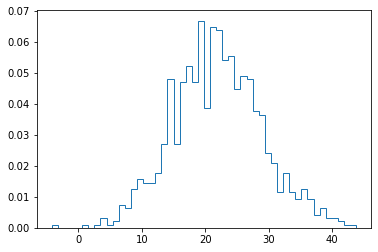

In [4]:
#define number of samples
nsamp=1000

with pm.Model() as model:
    #define parameter distributions
    par1 = pm.Normal('par1',5,3)
    par2 = pm.Normal('par2',3,1)
    par3 = pm.Normal('par3',2,1)
    par4 = pm.Normal('par4',3,2)
    #compute "thing"
    thingy = pm.Deterministic('thingy',total_model(par1,par2,par3,par4))
    #sample "thing"
    trace = pm.sample(draws=nsamp)

#print out median and 1 sigma values for "thing" + plot a histogram
print(np.median(trace['thingy']))
print(np.median(trace['thingy'])-np.quantile(trace['thingy'],0.15))
print(np.quantile(trace['thingy'],0.85)-np.median(trace['thingy']))
plt.hist(thing,bins=50,histtype='step',density=True)


# Compare the two methods

MC
21.756143477106306
6.960028722290964
7.089752540110986

MCMC
22.002783492611826
7.341963248061459
7.396548943214363


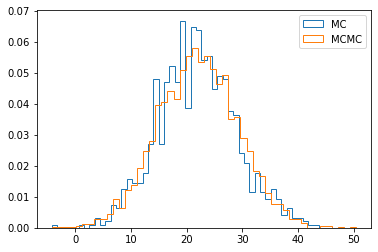

In [6]:
print('MC')
print(np.median(thing))
print(np.median(thing)-np.quantile(thing,0.15))
print(np.quantile(thing,0.85)-np.median(thing))
print('\nMCMC')
print(np.median(trace['thingy']))
print(np.median(trace['thingy'])-np.quantile(trace['thingy'],0.15))
print(np.quantile(trace['thingy'],0.85)-np.median(trace['thingy']))

plt.hist(thing,bins=50,density=True,histtype='step',label='MC')
plt.hist(trace['thingy'],bins=50,density=True,histtype='step',label='MCMC')
plt.legend()